In [59]:
subcategories = {
    "abstract_algebra": ["math"],
    "anatomy": ["health"],
    "astronomy": ["physics"],
    "business_ethics": ["business"],
    "clinical_knowledge": ["health"],
    "college_biology": ["biology"],
    "college_chemistry": ["chemistry"],
    "college_computer_science": ["computer science"],
    "college_mathematics": ["math"],
    "college_medicine": ["health"],
    "college_physics": ["physics"],
    "computer_security": ["computer science"],
    "conceptual_physics": ["physics"],
    "econometrics": ["economics"],
    "electrical_engineering": ["engineering"],
    "elementary_mathematics": ["math"],
    "formal_logic": ["philosophy"],
    "global_facts": ["other"],
    "high_school_biology": ["biology"],
    "high_school_chemistry": ["chemistry"],
    "high_school_computer_science": ["computer science"],
    "high_school_european_history": ["history"],
    "high_school_geography": ["geography"],
    "high_school_government_and_politics": ["politics"],
    "high_school_macroeconomics": ["economics"],
    "high_school_mathematics": ["math"],
    "high_school_microeconomics": ["economics"],
    "high_school_physics": ["physics"],
    "high_school_psychology": ["psychology"],
    "high_school_statistics": ["math"],
    "high_school_us_history": ["history"],
    "high_school_world_history": ["history"],
    "human_aging": ["health"],
    "human_sexuality": ["culture"],
    "international_law": ["law"],
    "jurisprudence": ["law"],
    "logical_fallacies": ["philosophy"],
    "machine_learning": ["computer science"],
    "management": ["business"],
    "marketing": ["business"],
    "medical_genetics": ["health"],
    "miscellaneous": ["other"],
    "moral_disputes": ["philosophy"],
    "moral_scenarios": ["philosophy"],
    "nutrition": ["health"],
    "philosophy": ["philosophy"],
    "prehistory": ["history"],
    "professional_accounting": ["other"],
    "professional_law": ["law"],
    "professional_medicine": ["health"],
    "professional_psychology": ["psychology"],
    "public_relations": ["politics"],
    "security_studies": ["politics"],
    "sociology": ["culture"],
    "us_foreign_policy": ["politics"],
    "virology": ["health"],
    "world_religions": ["philosophy"],
}

subcategories_reversed = {}
for key, value in subcategories.items():
    if value[0] in subcategories_reversed.keys():
        subcategories_reversed[value[0]].append(key)
    else:
        subcategories_reversed[value[0]] = [key]

categories = {
    "stem": ["physics", "chemistry", "biology", "computer science", "math", "engineering"],
    "humanities": ["history", "philosophy", "law"],
    "social_sciences": ["politics", "culture", "economics", "geography", "psychology"],
    "other": ["other", "business", "health"],
}

In [64]:
from pprint import pprint
import json

file_path = "evaluation_results/mmlu_noop_plus-cot_api-20241202_171708.json"
with open(file_path, "r") as file:
    json_data = json.load(file)

results = json_data.get("results", {})
model = json_data["pipeline_args"]["pretrained"]
baseline = results["mmlu-noop-plus-standard"]["acc,none"]
baseline_error = results["mmlu-noop-plus-standard"]["acc_stderr,none"]
pprint(results.keys())
print(model)

dict_keys(['mmlu-noop-plus', 'mmlu-noop-plus-addition', 'mmlu_noop_plus_humanities_addition', 'mmlu_noop_plus_formal_logic_addition', 'mmlu_noop_plus_high_school_european_history_addition', 'mmlu_noop_plus_high_school_us_history_addition', 'mmlu_noop_plus_high_school_world_history_addition', 'mmlu_noop_plus_international_law_addition', 'mmlu_noop_plus_jurisprudence_addition', 'mmlu_noop_plus_logical_fallacies_addition', 'mmlu_noop_plus_moral_disputes_addition', 'mmlu_noop_plus_moral_scenarios_addition', 'mmlu_noop_plus_philosophy_addition', 'mmlu_noop_plus_prehistory_addition', 'mmlu_noop_plus_professional_law_addition', 'mmlu_noop_plus_world_religions_addition', 'mmlu_noop_plus_other_addition', 'mmlu_noop_plus_business_ethics_addition', 'mmlu_noop_plus_clinical_knowledge_addition', 'mmlu_noop_plus_college_medicine_addition', 'mmlu_noop_plus_global_facts_addition', 'mmlu_noop_plus_human_aging_addition', 'mmlu_noop_plus_management_addition', 'mmlu_noop_plus_marketing_addition', 'mmlu_no

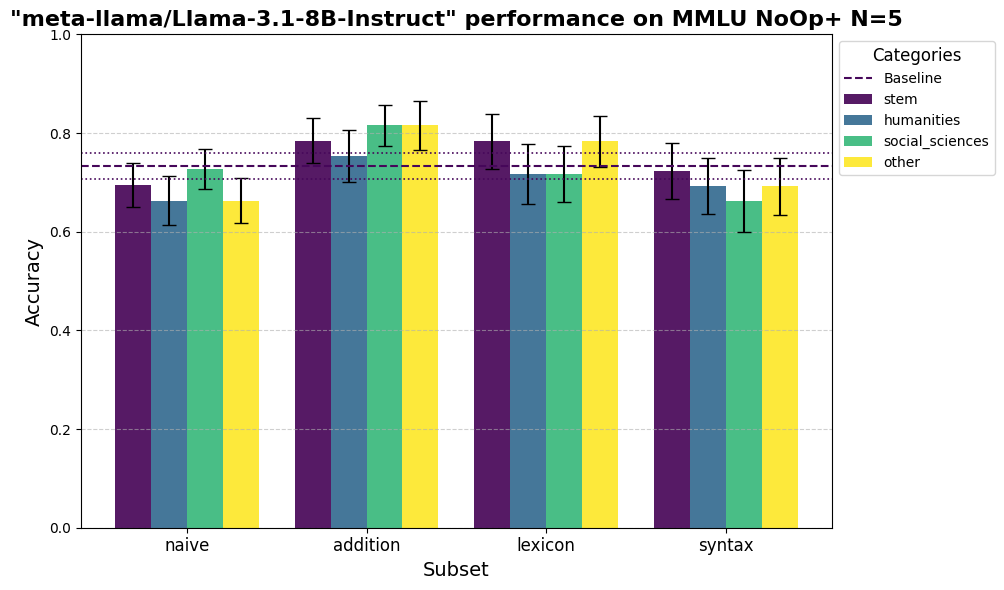

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

# Data
main_categories = ["naive", "addition", "lexicon", "syntax"]
sub_categories = categories.keys()
sub_data = [
    [results[f"mmlu_noop_plus_{category}_{suffix}"]["acc,none"] for suffix in main_categories ]for category in sub_categories]
sub_errors = [
    [results[f"mmlu_noop_plus_{category}_{suffix}"]["acc_stderr,none"] for suffix in main_categories ]for category in sub_categories]

# Bar width settings
bar_width = 0.8
sub_bar_width = bar_width / len(sub_categories)

# Positions for main categories
main_positions = np.arange(len(main_categories))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define a color palette using colormaps
color_map = colormaps["viridis"]
colors = [color_map(i / (len(sub_categories) - 1)) for i in range(len(sub_categories))]

# Plot each sub-category
for i, (sub_category, color) in enumerate(zip(sub_categories, colors)):
    # Offset positions for sub-bars
    sub_positions = main_positions - bar_width / 2 + i * sub_bar_width + sub_bar_width / 2

    # Plot sub-bars with transparency for better distinction
    heights = [sub[i] for sub in sub_data]
    errors = [sub[i] for sub in sub_errors]
    ax.bar(sub_positions, heights, sub_bar_width, yerr=errors, capsize=5, label=sub_category, color=color, alpha=0.9)

# Add baselines
ax.axhline(baseline,
          linestyle="dashed", color=color_map(len(sub_categories)), linewidth=1.5,
          label="Baseline")
ax.axhline(baseline + baseline_error, color=color_map(len(sub_categories)), linestyle='dotted', linewidth=1.2)
ax.axhline(baseline - baseline_error, color=color_map(len(sub_categories)), linestyle='dotted', linewidth=1.2)

# Customize x-axis
ax.set_xticks(main_positions)
ax.set_xticklabels(main_categories, fontsize=12)
ax.set_xlabel("Subset", fontsize=14)

# Customize y-axis
ax.set_ylabel("Accuracy", fontsize=14)
ax.set_ylim(0, 1.0)  # Add some padding

# Add title
ax.set_title(f'"{model}" performance on MMLU NoOp+ N=5', fontsize=16, fontweight="bold")


# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Customize legend
ax.legend(title="Categories", fontsize=10, title_fontsize=12, loc="upper left", bbox_to_anchor=(1, 1))

# Tight layout for better spacing
plt.tight_layout()

plt.show()
